In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

ModuleNotFoundError: No module named 'jupyterthemes'

In [59]:
reviews_df=pd.read_csv('tweets.csv')

In [60]:
reviews_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [61]:
reviews_df = reviews_df.drop(['textID'] , axis = 1)
reviews_df = reviews_df.drop(['selected_text'] , axis = 1)

In [62]:
reviews_df.describe()

,text,sentiment
count,27480,27481
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11118


<Axes: >

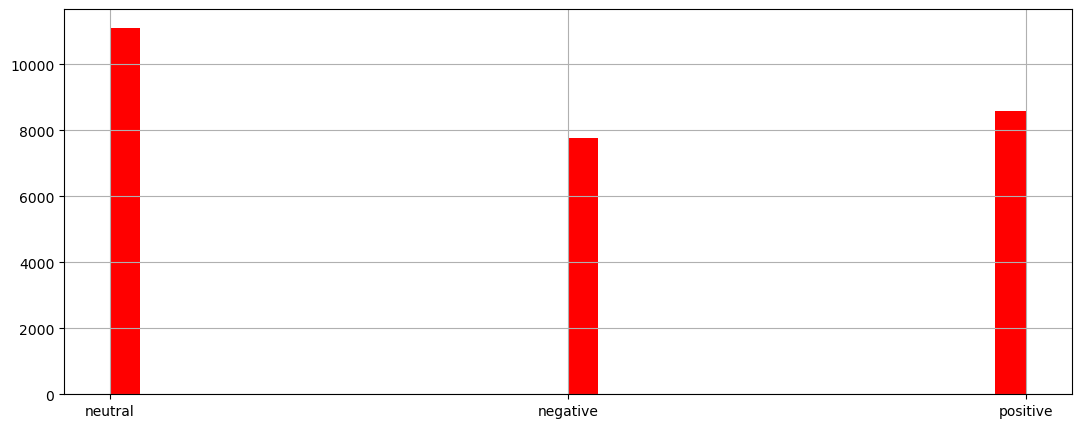

In [63]:
reviews_df['sentiment'].hist(bins=30 ,  figsize = (13,5) , color ='r')

In [64]:
sentiment_mapping = {
    'positive': 2,
    'negative': 0,
    'neutral' : 1,
}

# Apply the mapping to transform sentiment labels to numerical values
reviews_df['sentiment'] = reviews_df['sentiment'].map(sentiment_mapping)

In [65]:
reviews_df

,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
...,...,...
27476,wish we could come see u on Denver husband l...,0
27477,I`ve wondered about rake to. The client has ...,0
27478,Yay good for both of you. Enjoy the break - y...,2
27479,But it was worth it ****.,2


<Axes: >

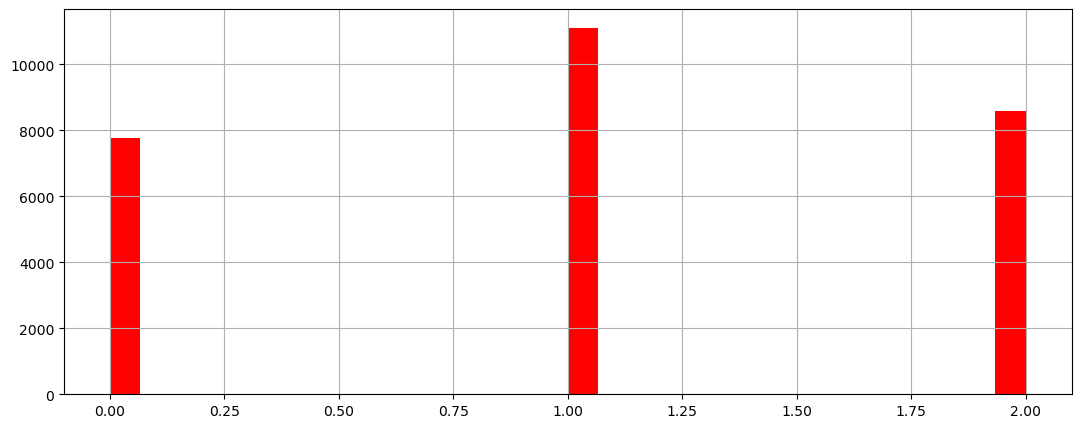

In [66]:
reviews_df['sentiment'].hist(bins=30 ,  figsize = (13,5) , color ='r')

In [18]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\Azizz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def message_cleaning(message) : 
    message = [ i for i in message if i not in string.punctuation]
    message = ''.join(message)
    message = message.split()
    message = [ word for word in message if word.lower() not in stopwords.words('english')]
    return message

In [35]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Azizz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer( analyzer = message_cleaning , dtype = np.uint8)
reviews_df['text'].fillna('', inplace=True)
X=vectorizer.fit_transform(reviews_df['text'])

In [68]:
print(X.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
X.shape

(27481, 35177)

In [70]:
X_df = pd.DataFrame(X.toarray())

In [71]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,35167,35168,35169,35170,35171,35172,35173,35174,35175,35176
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = reviews_df['sentiment']

In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test= train_test_split(X, y , test_size = 0.2)

In [97]:
>>> from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Azizz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

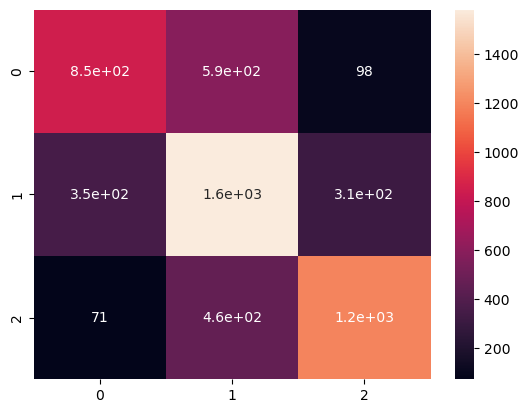

In [98]:
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1533
           1       0.60      0.71      0.65      2241
           2       0.74      0.70      0.72      1723

    accuracy                           0.66      5497
   macro avg       0.67      0.65      0.66      5497
weighted avg       0.67      0.66      0.66      5497



In [101]:
test=['i m happy ']
testing = vectorizer.transform(test)
X = pd.DataFrame(testing.toarray())
pred = model.predict(X)
if (pred== 2):
    print('positive')
elif ( pred == 0 ) :
    print('negative')
else :
    print('neutral')

positive
